In [2]:
import os
import pandas as pd
import numpy as np

# read the new york datasets into a dictionary.
# we can choose which dataset to look at easily this way

csvs = []
directory = r'C:\\Users\\aleca\\OneDrive\\Desktop\\cs396\\proposal\\new_york'
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        csvs.append(os.path.join(directory, filename))

dfs = {}
for csv in csvs:
    chunks = csv.split('\\')
    name_dot_csv = chunks[-1]
    name_csv = name_dot_csv.split('.')
    name = name_csv[0]
    dfs[name] = pd.read_csv(csv)
    
print(dfs.keys())

dict_keys(['calendar', 'listings', 'listings_summary', 'neighbourhoods', 'reviews', 'reviews_summary'])


In [3]:
print(dfs['calendar'].info())
print('\n\n next \n\n')
print(dfs['listings'].info())
print('\n\n next \n\n')
print(dfs['listings_summary'].info())
print('\n\n next \n\n')
print(dfs['neighbourhoods'].info())
print('\n\n next \n\n')
print(dfs['reviews'].info())
print('\n\n next \n\n')
print(dfs['reviews_summary'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13470765 entries, 0 to 13470764
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 719.4+ MB
None


 next 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-

In [23]:
dfs['listings']['amenities']
dfs['listings'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

In [15]:
# amenities are kept in strings of form '[Amenity1, Amenity2, ...]'
# these are of type STRING, not of type LIST, so I convert them to a list of just the amenity names

def strToLst(strLst):
    chunks = strLst.split('"')
    return chunks[1::2]

amenities_uniq = []

for row in dfs['listings']['amenities']:
    lst = strToLst(row)
    for amen in lst:
        if amen not in amenities_uniq:
            amenities_uniq.append(amen)
print(type(amenities_uniq))
print(type(amenities_uniq[0]))
amenities_uniq

<class 'list'>
<class 'str'>


['Free street parking',
 'Heating',
 'TV',
 'Dedicated workspace',
 'Cleaning before checkout',
 'Keypad',
 'Luggage dropoff allowed',
 'Stove',
 'Kitchen',
 'Baking sheet',
 'Air conditioning',
 'Oven',
 'Essentials',
 'Coffee maker',
 'Smoke alarm',
 'Fire extinguisher',
 'Cooking basics',
 'Wifi',
 'Ethernet connection',
 'Bathtub',
 'Iron',
 'Paid parking off premises',
 'Hair dryer',
 'Long term stays allowed',
 'Hot water',
 'Bed linens',
 'Extra pillows and blankets',
 'Hangers',
 'Carbon monoxide alarm',
 'Refrigerator',
 'Dishes and silverware',
 'Cable TV',
 'Children\\u2019s books and toys',
 'Microwave',
 'Baby safety gates',
 'TV with standard cable',
 'Free parking on premises',
 'Lockbox',
 'High chair',
 'Pack \\u2019n Play/travel crib',
 'Shampoo',
 'Dryer',
 'BBQ grill',
 'Washer',
 'Outdoor furniture',
 'Outdoor dining area',
 'Lock on bedroom door',
 'Elevator',
 'Host greets you',
 'Breakfast',
 'Children\\u2019s books and toys for ages 0-2 years old, 2-5 years old

In [17]:
from collections import Counter
import operator

# create a Counter object that maps amenities to the number of times they appear

amenities_all = []

for row in dfs['listings']['amenities']:
    lst = strToLst(row)
    for amen in lst:
        amenities_all.append(amen)
counts = Counter(amenities_all)
sorted_counts = dict(sorted(counts.items(), key=operator.itemgetter(1),reverse=True))
for key, value in sorted_counts.items():
    print(key, ' : ', value)
    

Wifi  :  35359
Long term stays allowed  :  33746
Heating  :  33260
Kitchen  :  32900
Essentials  :  32622
Smoke alarm  :  32243
Air conditioning  :  30690
Hangers  :  27548
Carbon monoxide alarm  :  26922
Hair dryer  :  23101
Iron  :  22843
Dedicated workspace  :  22784
Shampoo  :  22527
Hot water  :  21903
TV  :  18225
Dishes and silverware  :  16978
Refrigerator  :  16848
Cooking basics  :  16116
Microwave  :  15253
Washer  :  14504
Fire extinguisher  :  14501
Dryer  :  14084
Stove  :  13783
Oven  :  13676
Free street parking  :  13418
Coffee maker  :  13409
Bed linens  :  13183
First aid kit  :  12483
,   :  10870
Private entrance  :  8973
Extra pillows and blankets  :  8865
Lock on bedroom door  :  8815
Elevator  :  8695
Cable TV  :  7622
TV with standard cable  :  7404
Dishwasher  :  6764
Luggage dropoff allowed  :  6416
Security cameras on property  :  5628
Lockbox  :  5487
Bathtub  :  5454
Host greets you  :  4497
Shower gel  :  3961
Freezer  :  3821
Gym  :  3745
Patio or balcon

average frequency of amenities:  443.9080396475771
std dev of amenities:  2907.8480973700903
Q1:  1.0
Q2:  1.0
Q3:  3.0
0.9600000000000001th percentile is first to be >= 1000 and is:  1014.600000000014


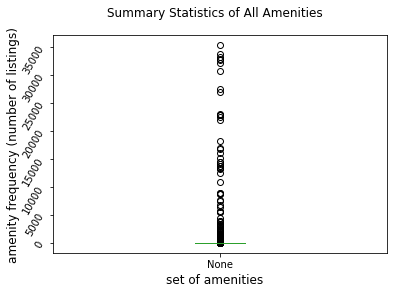

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# summary statistics of the amenities
ser = pd.Series(sorted_counts.values())
print('average frequency of amenities: ', ser.mean())
print('std dev of amenities: ', ser.std())
quants = [.25, .5, .75]
quant_calc = ser.quantile([.25, .5, .75])
for i in range(len(quants)):
    print('Q{}: '.format(i+1), quant_calc.iloc[i])
    
for i in np.linspace(.01, 1, 100):
    if ser.quantile(i) >= 1000:
        print('{}th percentile is first to be >= 1000 and is: '.format(i), ser.quantile(i))
        break

fig, axes = plt.subplots()
fig.suptitle('Summary Statistics of All Amenities')
fig.supxlabel('set of amenities')
fig.supylabel('amenity frequency (number of listings)')
plt.setp(axes.get_yticklabels(), rotation=60, horizontalalignment='right')

ser.plot.box()

plt.show()
# we see that most amenities appear very few (<1000) times and 75% appear at most 3 times

In [92]:
# make dictionary mapping frequency to the number of amenities that appear in that many listings
num_of_occur = {}
for freq in sorted_counts:
    if sorted_counts[freq] not in num_of_occur:
        num_of_occur[sorted_counts[freq]] = 1
    else:
        num_of_occur[sorted_counts[freq]] += 1
        
# count the number of amenities that appear 100+ times       
gr_eq1000 = 0
all_freq = 0
for key, value in num_of_occur.items():
    if key >= 1000:
        gr_eq1000 += value
    all_freq += value
    #print(key, ' : ', value)
    
print('number of amenities that appear in 1000+ listings: ', gr_eq1000)
print('total number of amenities:', all_freq)
print('fraction of amenities that appear in 1000+ listings: ', gr_eq1000/all_freq)
    
# there are very few amenities that appear in 1000+ listings

number of amenities that appear in 1000+ listings:  73
total number of amenities: 1816
fraction of amenities that appear in 1000+ listings:  0.040198237885462555


In [41]:
# check how much of the total amenities is made up of low-frequency vs high-frequency amenities
low_freq = 0
high_freq = 0
for occur in num_of_occur:
    if occur < 1000:
        low_freq += occur * num_of_occur[occur]
    else:
        high_freq += occur * num_of_occur[occur]
        
print('number of occurances of low-frequency (appear in <1000 listings) amenities: ', low_freq)
print('number of occurances of high-frequency (appear in 1000+ listings) amenities: ', high_freq)
print('fraction all occurrances of amenities that are high-frequency: ', high_freq/(low_freq+high_freq))

# there are a few amenities that make up the bulk of the amenities in listings

number of occurances of low-frequency (appear in <1000 listings) amenities:  31525
number of occurances of high-frequency (appear in 1000+ listings) amenities:  774612
fraction all occurrances of amenities that are high-frequency:  0.9608937438673575


average frequency of popular amenities:  10611.123287671233
std dev of popular amenities:  10186.601232263123
Q1:  2492.0
Q2:  6416.0
Q3:  15253.0
IQR:  12761.0


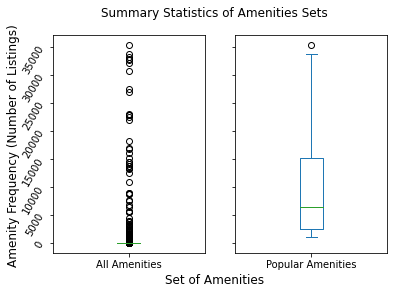

In [105]:
# make a list of just the popular (appear in 1000+ listings) amenities
pop_amens = []
pop_counts = {}
for amen in sorted_counts:
    if sorted_counts[amen] >= 1000:
        pop_amens.append(amen)
        pop_counts[amen] = sorted_counts[amen]
pop_amens

# summary statistics of these amenities
pop = pd.Series(pop_counts.values())
#print(pop.mean())
#print(pop.std())
#print(pop.quantile([.25, .5, .75]))
#print(pop.quantile(.75) - pop.quantile(.25))

print('average frequency of popular amenities: ', pop.mean())
print('std dev of popular amenities: ', pop.std())
quants = [.25, .5, .75]
quant_calc = pop.quantile([.25, .5, .75])
for i in range(len(quants)):
    print('Q{}: '.format(i+1), quant_calc.iloc[i])
print('IQR: ', pop.quantile(.75) - pop.quantile(.25))


fig, axes = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Summary Statistics of Amenities Sets')
fig.supxlabel('Set of Amenities')
fig.supylabel('Amenity Frequency (Number of Listings)')
plt.setp(axes[0].get_yticklabels(), rotation=60, horizontalalignment='right')

ser.plot.box(ax=axes[0], subplots=True, label='All Amenities')
pop.plot.box(ax=axes[1], subplots=True, label='Popular Amenities')

plt.show()
# these are more informative statistics

In [58]:
# make a matrix (df) where rows are listings and columns are amenities
# each cell will be 1 if the listing has a given amenity or 0 if not

amen_arr = np.zeros((dfs['listings'].shape[0], len(pop_amens)))
amen_arr.shape

for row in range(dfs['listings']['amenities'].shape[0]):
    lst = strToLst(dfs['listings']['amenities'][row])
    for amen in lst:
        if amen in pop_amens:
            amen_arr[row][pop_amens.index(amen)] = 1
            
amen_df = pd.DataFrame(amen_arr)
amen_df.columns = pop_amens   

In [110]:
# compute pearson correlation between pairs of amenities
print('correlation between washer and dryer: ', amen_df['Washer'].corr(amen_df['Dryer']))

# correlation matrix
corr_matrix = amen_df.corr()

# store strong correlations (abs(corr) >= .7)
sig_corrs = {}

# loop over pairs of amenities
for amen1 in corr_matrix.columns:
    for amen2 in corr_matrix.columns:
        # add to strong correlation dictionary
        if amen1 != amen2 and abs(amen_df[amen1].corr(amen_df[amen2])) >= .7:
            if amen1 not in sig_corrs:
                sig_corrs[amen1] = {}
            sig_corrs[amen1][amen2] = amen_df[amen1].corr(amen_df[amen2])

for key, val in sig_corrs.items():
    print(key, ': ', val)
#print(corr_matrix.shape)
#print(corr_matrix.head())
#print(corr_matrix.info())

# make the dictionary into a table
sig_corr_matrix = np.zeros((len(sig_corrs), len(sig_corrs)))
sig_corr_matrix = pd.DataFrame(sig_corr_matrix)
sig_corr_matrix.set_axis(sig_corrs.keys(), axis=0, inplace=True)
sig_corr_matrix.set_axis(sig_corrs.keys(), axis=1, inplace=True)
for key1 in sig_corrs:
    for key2 in sig_corrs[key1]:
        sig_corr_matrix.loc[key1, key2] = sig_corrs[key1][key2]
sig_corr_matrix

correlation between washer and dryer:  0.9344125766868218
Dishes and silverware :  {'Refrigerator': 0.7876025588441539, 'Cooking basics': 0.7623550775089251, 'Microwave': 0.7036113459556498, 'Stove': 0.7265029706336813}
Refrigerator :  {'Dishes and silverware': 0.7876025588441539, 'Cooking basics': 0.7077420355722707, 'Microwave': 0.7814088274404998, 'Stove': 0.7920854371717311, 'Oven': 0.7891599638182938}
Cooking basics :  {'Dishes and silverware': 0.7623550775089251, 'Refrigerator': 0.7077420355722707, 'Stove': 0.7266573033513419, 'Oven': 0.7051632803804122}
Microwave :  {'Dishes and silverware': 0.7036113459556498, 'Refrigerator': 0.7814088274404998}
Washer :  {'Dryer': 0.9344125766868218}
Dryer :  {'Washer': 0.9344125766868216}
Stove :  {'Dishes and silverware': 0.7265029706336814, 'Refrigerator': 0.7920854371717311, 'Cooking basics': 0.7266573033513418, 'Oven': 0.8464400474218342}
Oven :  {'Refrigerator': 0.7891599638182938, 'Cooking basics': 0.7051632803804122, 'Stove': 0.8464400

,Dishes and silverware,Refrigerator,Cooking basics,Microwave,Washer,Dryer,Stove,Oven,Cable TV,TV with standard cable,Body soap,Conditioner
Dishes and silverware,0.000000,0.787603,0.762355,0.703611,0.000000,0.000000,0.726503,0.000000,0.000000,0.000000,0.000000,0.000000
Refrigerator,0.787603,0.000000,0.707742,0.781409,0.000000,0.000000,0.792085,0.789160,0.000000,0.000000,0.000000,0.000000
Cooking basics,0.762355,0.707742,0.000000,0.000000,0.000000,0.000000,0.726657,0.705163,0.000000,0.000000,0.000000,0.000000
Microwave,0.703611,0.781409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Washer,0.000000,0.000000,0.000000,0.000000,0.000000,0.934413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dryer,0.000000,0.000000,0.000000,0.000000,0.934413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stove,0.726503,0.792085,0.726657,0.000000,0.000000,0.000000,0.000000,0.846440,0.000000,0.000000,0.000000,0.000000
Oven,0.000000,0.789160,0.705163,0.000000,0.000000,0.000000,0.846440,0.000000,0.000000,0.000000,0.000000,0.000000
Cable TV,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.981448,0.000000,0.000000
TV with standard cable,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.981448,0.000000,0.000000,0.000000


In [91]:
# apriori algo took over 30 min so I stopped it => maybe try with less amenities

import re
import sys
!{sys.executable} -m pip install apyori
from apyori import apriori

transactions1 = []
for row in dfs['listings']['amenities']:
    amen_lst = strToLst(row)
    for amen in amen_lst:
        if amen in pop_amens:
            transactions1.append(amen_lst)
            break
            
transactions2 = []
for row in dfs['listings']['amenities']:
    amen_lst = strToLst(row)
    valid = True
    for amen in amen_lst:
        if amen not in pop_amens:
            valid = False
            break
    if valid:
        transactions2.append(amen_lst)
        
print(dfs['listings']['amenities'].shape)
print(len(transactions1))
print(len(transactions2))
            
""" 
rules = list(apriori(transactions2, min_support=0.1,min_confidence=0.7,min_lift=2))
print('number of rules: ', len(rules), '\n')

# print nicely
for item in rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")
"""

(36923,)
36921
27215


' \nrules = list(apriori(transactions2, min_support=0.1,min_confidence=0.7,min_lift=2))\nprint(\'number of rules: \', len(rules), \'\n\')\n\n# print nicely\nfor item in rules:\n\n    # first index of the inner list\n    # Contains base item and add item\n    pair = item[0] \n    items = [x for x in pair]\n    print("Rule: " + items[0] + " -> " + items[1])\n\n    #second index of the inner list\n    print("Support: " + str(item[1]))\n\n    #third index of the list located at 0th\n    #of the third index of the inner list\n\n    print("Confidence: " + str(item[2][0][2]))\n    print("Lift: " + str(item[2][0][3]))\n    print("=====================================")\n'

In [129]:
dfs['reviews']['comments']

0         Notre séjour de trois nuits.\r<br/>Nous avons ...
1                                         Great experience.
2         I've stayed with my friend at the Midtown Cast...
3         We've been staying here for about 9 nights, en...
4         We had a wonderful stay at Jennifer's charming...
                                ...                        
848720    This was one of the Best hotel experiences I h...
848721    The room was exactly as described and was over...
848722    Fast response <br/>Easy check in <br/><br/>Dep...
848723       Amazing location and place! You will love it !
848724    Okay stay. Needs time to prep for guests thoug...
Name: comments, Length: 848725, dtype: object

In [132]:
words = {}
for row in range(dfs['reviews']['comments'].shape[0]):
    

str

In [135]:
dfs['listings']['review_scores_value']

0        4.41
1        4.65
2        4.52
3        5.00
4        4.36
         ... 
36918     NaN
36919     NaN
36920     NaN
36921     NaN
36922     NaN
Name: review_scores_value, Length: 36923, dtype: float64

In [114]:
# Most common words in reviews
# Most common words in listings

# Find the most common amenities-words in reviews
# Find the most common amenities-words in listings

reviews = dfs['reviews']
#print(reviews['comments'])

reviews_sample = reviews.sample(5000)

comments_sample = reviews_sample['comments'].dropna()
#print(type(comments_sample))

freqs = {}
for com in comments_sample:
    #print(com)
    #print(type(com))
    words_in_com = com.split()
    for word in words_in_com:
        if word in amenities_uniq:
            if word in freqs:
                freqs[word] += 1
            else:
                freqs[word] = 1


sorted_word_freqs = sorted(freqs.items(), key=lambda item: item[1], reverse=True)
print(sorted_word_freqs)

reviews.info()

[('TV', 41), ('Kitchen', 17), ('Safe', 9), ('Garden', 8), ('bikes', 5), ('Wifi', 3), ('Gym', 2), ('Heating', 1), ('Stove', 1), ('Crib', 1), ('HDTV', 1), ('Oven', 1), ('Breakfast', 1), ('Washer', 1)]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848725 entries, 0 to 848724
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     848725 non-null  int64 
 1   id             848725 non-null  int64 
 2   date           848725 non-null  object
 3   reviewer_id    848725 non-null  int64 
 4   reviewer_name  848719 non-null  object
 5   comments       847901 non-null  object
dtypes: int64(3), object(3)
memory usage: 38.9+ MB


In [125]:
reviews = dfs['reviews']
#reviews.info()

freqs = {}
for comment in reviews['comments'].dropna():
    words = comment.split()
    for word in words:
        if word in pop_amens:
            if word in freqs:
                freqs[word] += 1
            else:
                freqs[word] = 1
                
sorted_freq_lst = sorted(freqs.items(), key=lambda item: item[1], reverse=True)
sorted_freqs = {}
for tup in sorted_freq_lst:
    sorted_freqs[tup[0]] = tup[1]
for key, value in sorted_freqs.items():
    print(key, ': ', value)

TV :  6715
Kitchen :  2744
Wifi :  1244
Breakfast :  387
Washer :  189
Backyard :  123
Elevator :  117
Heating :  109
Shampoo :  71
Iron :  58
Microwave :  54
Gym :  46
Refrigerator :  41
Stove :  34
Conditioner :  32
Dryer :  30
Lockbox :  27
Toaster :  25
Bathtub :  24
Oven :  22
Keypad :  20
Dishwasher :  19
Essentials :  19
Hangers :  7
Freezer :  5


In [172]:
print('total number of comments: ', reviews['comments'].dropna().shape[0])
print('number of popular ammenities mentioned in comments: ', len(sorted_freqs.keys()), ' of ', len(pop_amens))
comms = pd.Series(sorted_freqs.values())

max_amen = max(sorted_freqs, key=sorted_freqs.get)
print('amenity mentioned in most comments: ', max_amen, ': ', sorted_freqs[max_amen])
min_amen = min(sorted_freqs, key=sorted_freqs.get)
print('amenity mentioned in least comments (greater than 0): ', min_amen, ': ', sorted_freqs[min_amen])

print('average frequency of popular amenities: ', comms.mean())
print('std dev of popular amenities: ', comms.std())
quants = [.25, .5, .75]
quant_calc = comms.quantile([.25, .5, .75])
for i in range(len(quants)):
    print('Q{}: '.format(i+1), quant_calc.iloc[i])
print('IQR: ', comms.quantile(.75) - comms.quantile(.25))



"""
fig, axes = plt.subplots(ncols=2, sharey=False)
fig.suptitle('Summary Statistics of Popular Amenities in  Review Comments')
fig.supxlabel('Scaling')
plt.setp(axes[0].get_yticklabels(), rotation=60, horizontalalignment='right')
fig.tight_layout(pad=2)

ser.plot.box(ax=axes[0], subplots=True, ylabel='Amenity Frequency (Number of Comments)', label='Popular Amenities, Normal Scale')
pop.plot.box(ax=axes[1], subplots=True, ylabel='Amenity Frequency (Number of Comments)', logy=True, label='Popular Amenities, Log Scale')

plt.show()
"""

total number of comments:  847901
number of popular ammenities mentioned in comments:  25  of  73
amenity mentioned in most comments:  TV :  6715
amenity mentioned in least comments (greater than 0):  Freezer :  5
average frequency of popular amenities:  486.48
std dev of popular amenities:  1421.5561344292155
Q1:  24.0
Q2:  41.0
Q3:  117.0
IQR:  93.0


"\nfig, axes = plt.subplots(ncols=2, sharey=False)\nfig.suptitle('Summary Statistics of Popular Amenities in  Review Comments')\nfig.supxlabel('Scaling')\nplt.setp(axes[0].get_yticklabels(), rotation=60, horizontalalignment='right')\nfig.tight_layout(pad=2)\n\nser.plot.box(ax=axes[0], subplots=True, ylabel='Amenity Frequency (Number of Comments)', label='Popular Amenities, Normal Scale')\npop.plot.box(ax=axes[1], subplots=True, ylabel='Amenity Frequency (Number of Comments)', logy=True, label='Popular Amenities, Log Scale')\n\nplt.show()\n"

<AxesSubplot:title={'center':'Amenities in Review Comments'}, ylabel='Number of Comments'>

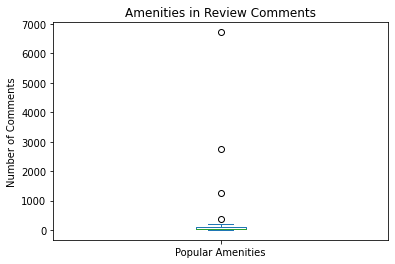

In [173]:
comms.plot.box(title='Amenities in Review Comments',
              ylabel='Number of Comments',
              label='Popular Amenities',
              logy=False)

<AxesSubplot:title={'center':'Amenities in Review Comments (Log Scale)'}, ylabel='Log Number of Comments'>

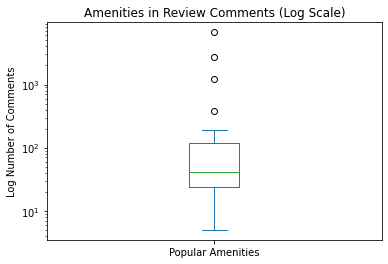

In [174]:
comms.plot.box(title='Amenities in Review Comments (Log Scale)',
              ylabel='Log Number of Comments',
              label='Popular Amenities',
              logy=True)



                                reviews  listings
Wifi                             1244.0   35359.0
Long term stays allowed             NaN   33746.0
Heating                           109.0   33260.0
Kitchen                          2744.0   32900.0
Essentials                         19.0   32622.0
...                                 ...       ...
Window guards                       NaN    1270.0
Outdoor furniture                   NaN    1254.0
Hot tub                             NaN    1137.0
Children\u2019s books and toys      NaN    1051.0
Clothing storage                    NaN    1041.0

[73 rows x 2 columns]


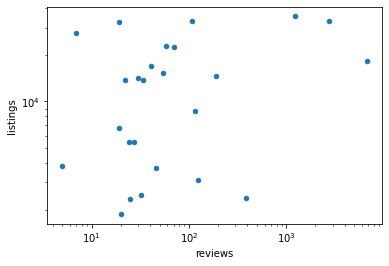

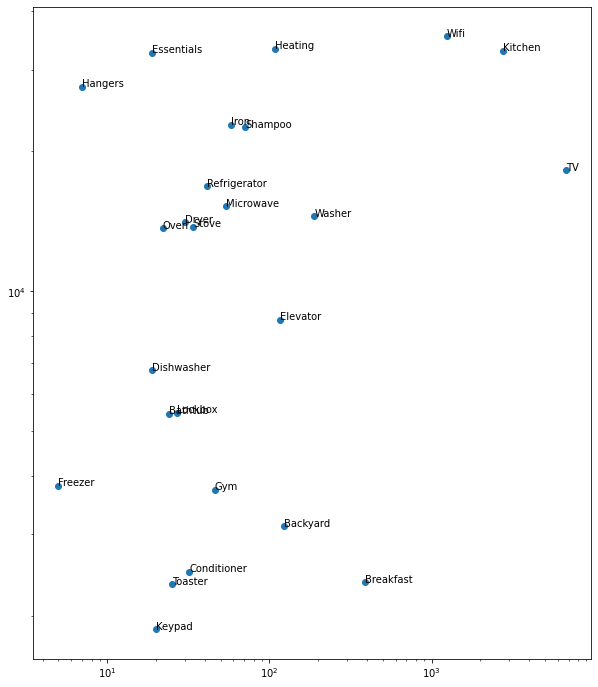

In [151]:
# sorted_freqs and sorted_counts
# scatterplot where x axis is freq in comments and y axis is freq in listings and dots are labelled

# make a df with rows=amenities and columns=x,y
coords = np.empty((len(pop_amens), 2))
coords[:] = np.NaN
coords = pd.DataFrame(coords)
coords.set_axis(pop_amens, axis=0, inplace=True)
coords.set_axis(['reviews', 'listings'], axis=1, inplace=True)
for amen in pop_amens:
    coords.loc[amen, 'listings'] = sorted_counts[amen]
    if amen in sorted_freqs:
        coords.loc[amen, 'reviews'] = sorted_freqs[amen]
print(coords.head(73))

# scatterplot
coords.plot.scatter('reviews', 'listings', logx=True, logy=True)

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(coords['reviews'], coords['listings'])#, logx=True, logy=True)

for i, txt in enumerate(list(coords.index.values)):
    ax.annotate(txt, (coords['reviews'].iloc[i], coords['listings'].iloc[i]))
fig.set_size_inches(10, 12, forward=True)